# Demonstrate animation_tools module

This [Jupyter notebook](http://www.jupyter.org) can be found in this [collection of Clawpack apps](http://www.clawpack.org/apps.html) as the file [$CLAW/apps/notebooks/visclaw/animation_tools_demo.ipynb](https://github.com/clawpack/apps/tree/master/notebooks/visclaw/animation_tools_demo.ipynb).  
To run this notebook, [install Clawpack](http://www.clawpack.org/installing.html), and download it from the link above, or clone the entire [apps repository](https://github.com/clawpack/apps).
A static view of this and other notebooks can be found in the [Clawpack Gallery of Jupyter notebooks](http://www.clawpack.org/gallery/notebooks.html).

This notebook demonstrates the tools in the `clawpack.visclaw.animation_tools` module (new in Version 5.4.0 and substantially updated in v5.7.0), which facilitates creating a list of figures or images and viewing them as an animation.  

Several approaches are supported:

 - Using the `ipywidgets.interact` allows generating an interactive widget for sweeping through the frames.  This may be easiest to work with when running a notebook interactively, including when using <http://mybinder.org>.
 
 - Creating an animation as javascript in the notebook.  This can now be done directly using the `to_jshtml` method defined for an animation created using [matplotlib.animation](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.animation.Animation.html). 
   *Historical note:* this approach was first pioneered in Clawpack and developed further by Jake Vanderplas in his [JSAnimation](https://github.com/jakevdp/JSAnimation) package, later incorporated into matplotlib.

 - Alternatively the `to_html5_video` method can be used to create an mp4 video.

 - The `to_jshtml` versions can also be embedded in another webpage or in Sphinx documentation, using the `animation_tools.make_html` and `animation_tools.make_rst` functions.

All of these possibilities are illustrated below.
 

### Converting frames in a Clawpack `_plots` directory to animations:
 
The `animation_tools.make_anim_outputs_from_plotdir` function (illustrated at the bottom of this notebook) can be used to turn the png files in a Clawpack `_plots` directory into stand-alone `.html`, `.mp4`, or `.rst` files.

The advantage of this approach is that it uses `png` files already created in the `_plots` directory by `make plots` and so is an easy way to make an mpeg video with comparable resolution to the animations linked from the `_PlotIndex.html`, which are html versions of the same animations.

The disadvantage of these animations is that they are typically low resolution since they read in `png` files and redisplay them with `imshow`, and the filesizes are often quite large if there are many frames.

A better way to make higher-resolution animations (that are also generally smaller) is to use the [`matplotlib.animation`](https://matplotlib.org/stable/users/explain/animations/animations.html) tools more directly to create a figure and then provide an update function that only modifies the parts of the figure that change from one frame to the next.  This approach is not illustrated in this notebook, but can be found in the Python script [make_fgout_animation.py](https://www.clawpack.org/gallery/_static/geoclaw/examples/tsunami/chile2010_fgmax-fgout/make_fgout_animation.py.html) found in the GeoClaw example [$CLAW/geoclaw/examples/tsunami/chile2010_fgmax-fgout](https://www.clawpack.org/gallery/_static/geoclaw/examples/tsunami/chile2010_fgmax-fgout/README.html).


In [29]:
%matplotlib inline

In [30]:
from pylab import *
from __future__ import print_function
from ipywidgets import interact, interact_manual
import ipywidgets
import os
import io
import base64
from IPython.display import display, FileLink, FileLinks, HTML

In [31]:
from clawpack.visclaw import animation_tools

## Generate a set of figures to use for demos

You can make figures however you want.  As they are created, append to a list called `figs`:

In [32]:
figs = []
x = linspace(0,1,1000)

for k in range(11):
    fig = figure(figsize=(5,3))
    plot(x, sin(2*pi*k*x), 'b')
    ylim(-1.1,1.1)
    title('$\sin(2\pi kx)$ for k = %s' % k)
    figs.append(fig)
    close(fig)

## Animating using widgets

IPywidgets are sometimes a nice way to animate a set of images.  But note that the widgets only work if you are running the notebook.  If you save it as an html file (e.g. to post on the web) then the widgets don't work. So if you are viewing a rendered version of this notebook, you won't see output for several of the cells below unless you download and run the notebook.

A better approach is generally to embed the animation as javascript or an mp4 file, as discussed in the next section.

### Animating a list of figures

The tool `animation_tools.interact_animate_figs` can be used to create an interact that loops over all the frames contained in a list of figures.

In [33]:
animation_tools.interact_animate_figs(figs)

interactive(children=(IntSlider(value=0, description='frameno', max=10), Output()), _dom_classes=('widget-inte…

Passing in the argument `manual=True` will use the widget `interact_manual` instead of `interact`.  This refrains from updating the image as you move the slider bar.  Instead you move the slider as desired and then click on the `Run` button to re-display the image.  This is useful if there are many frames and you want to be able to jump to around without all the intermediate frames being displayed, which can slow down the response significantly.

In [34]:
animation_tools.interact_animate_figs(figs, manual=True)

interactive(children=(IntSlider(value=0, description='frameno', max=10), Button(description='Run Interact', st…

The argument `TextInput=True` can be specified to produce a text input cell rather than a slider bar:

In [35]:
animation_tools.interact_animate_figs(figs, manual=True, TextInput=True)

Valid frameno values: from 0 to 10


interactive(children=(IntText(value=0, description='frameno'), Button(description='Run Interact', style=Button…

### Animating a list of images

The tool `animation_tools.interact_animate_images` can be used to create an interact that loops over all the frames contained in a list of images rather than figures. The images can be generated from a list of figures, as illustrated in the next cell.  Or they can be read in from a directory of png files, for example, as illustrated later.

This function also takes the arguments `manual` and `TextInput` as described above, with default values `False`.

interactive(children=(IntSlider(value=0, description='frameno', max=10), Output()), _dom_classes=('widget-inte…

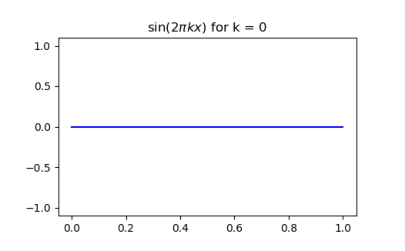

In [36]:
images = animation_tools.make_images(figs)
animation_tools.interact_animate_images(images, figsize=(6,3))

## Inline animation as a movie

A list of images can also be turned into a animation inline plot.  This is often preferable to using widgets. In particular, these movies are persistent if you export the notebook as an html file and can be played by anyone viewing the html file.

In [37]:
images = animation_tools.make_images(figs)
anim = animation_tools.animate_images(images, figsize=(6,3))

### As javascript:

In [38]:
HTML(anim.to_jshtml())

### As mp4 video

Note that [ffmpeg](https://ffmpeg.org) must be installed in order to create an `mp4` file, and that `anim.to_html5_video() creates an mpeg file that can be viewed right in the browser as follows:

In [39]:
HTML(anim.to_html5_video())

### Stand-alone mp4 file

To make a standalone mpeg file, use the `make_mp4` function. This wraps the matplotlib commands:

    writer = animation.writers['ffmpeg'](fps=fps)
    anim.save(file_name, writer=writer)

with appropriate arguments set. 

In [40]:
file_name = 'SineFunctions.mp4'
animation_tools.make_mp4(anim, file_name=file_name)  # fps=3 is default

Created SineFunctions.mp4


### Stand-alone html file

A separate stand-alone html page can be created with using `anim.to_jshtml()`. The `animation_tools.make_html` function wraps this and passes in appropriate arguments.  The resulting html file can be posted on the web for others to view, for example.

In [41]:
file_name = 'SineFunctions.html'
animation_tools.make_html(anim, file_name=file_name, title="Sine Functions", 
                          raw_html="Illustration of html file created by <tt>make_html</tt>")
FileLink(file_name)

Created SineFunctions.html


/home/edwin/Workbench/Docencia/programas_en_desarrollo/python_projects/clawpack/SineFunctions.html

### reStructured text file

You can also produce a `.rst` file containing the animation, which can be incorporated into Sphinx documentation:

In [42]:
file_name = 'SineFunctions.rst'
animation_tools.make_rst(anim, file_name=file_name)

Created SineFunctions.rst
Imbed this in another rst file using:
.. include:: SineFunctions.rst


## Create a directory of png files

Sometimes it is useful to create a directory containing png files for each figure, or you might have such a directory generated by other means (e.g. from VisClaw).

Here we create a directory named `_plots` to store png files for each frame:

In [18]:
plotdir = '_plots'
animation_tools.make_plotdir(plotdir, clobber=True)

Figure files for each frame will be stored in  _plots


You can create frames any way you wish and then use `animation_tools.save_frame` to save each one.  You can also explicitly call `savefig`, but then you should construct file names such that `glob.glob` can be used to return a list of filenames in the directory that are in the correct order for plotting as frames in an animation.  The `animation_tools.save_frame` creates names such as `frame00000.png` etc. as shown below.  The optional argument `fname_base` can be used to change `frame` to something else.

In [19]:
x = linspace(0,1,1000)

for k in range(5):
    fig = figure(figsize=(6,3))
    plot(x, cos(2*pi*k*x), 'b')
    ylim(-1.1,1.1)
    title('$\cos(2\pi kx)$ for k = %s' % k)
    animation_tools.save_frame(k, verbose=True)
    close(fig)

Saved  _plots/frame00000.png
Saved  _plots/frame00001.png
Saved  _plots/frame00002.png
Saved  _plots/frame00003.png
Saved  _plots/frame00004.png


In [20]:
FileLinks(plotdir)

_plots/
  frame00001.png
  frame00003.png
  frame00002.png
  frame00000.png
  frame00004.png

Given such a directory of png files, we can read them in using `animation_tools.read_images` to produce a list of images:

In [21]:
cosine_images = animation_tools.read_images(plotdir='_plots', fname_pattern='frame*.png')
print("Found %i images" % len(cosine_images))

Found 5 images


The resulting list of images `new_images` can now be animated using any of the tools illustrated earlier, e.g.

In [22]:
#animation_tools.interact_animate_images(cosine_images)
anim = animation_tools.animate_images(cosine_images, figsize=(6,3))
HTML(anim.to_jshtml())

## Saving a list of figures or images

If you already have a list of figures or images and wish to create a directory containing them, the utilities `animation_tools.save_figs` or `animation_tools.save_images` can be used.  For example:

In [23]:
kwargs = {'dpi':150}
animation_tools.save_images(cosine_images, plotdir='cosine_images', fname_base='wavenumber', 
                            format='png', verbose=True, **kwargs)
FileLinks('cosine_images')

Figure files for each frame will be stored in  cosine_images
Saved  cosine_images/wavenumber00000.png
Saved  cosine_images/wavenumber00001.png
Saved  cosine_images/wavenumber00002.png
Saved  cosine_images/wavenumber00003.png
Saved  cosine_images/wavenumber00004.png


cosine_images/
  wavenumber00001.png
  wavenumber00002.png
  wavenumber00003.png
  wavenumber00004.png
  wavenumber00000.png

interactive(children=(IntSlider(value=0, description='frameno', max=4), Output()), _dom_classes=('widget-inter…

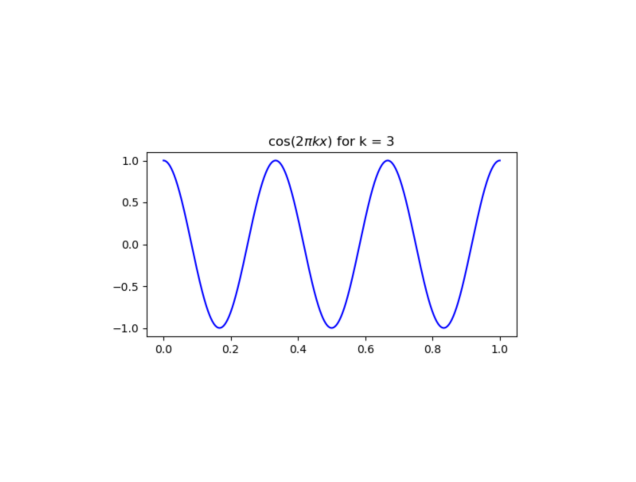

In [25]:
reload_images = animation_tools.read_images(plotdir='cosine_images', fname_pattern='wavenumber*.png')
animation_tools.interact_animate_images(reload_images)

## Animate Clawpack results 

Finally we illustrate how plots in an existing `_plots` directory created using a Fortran version of Clawpack Classic, AMRClaw, or GeoClaw can be animated in the notebook.

Here we assume the `plotdir` referenced below has already been created e.g. via `make .plots` at the command line.

Also take a look at the `clawutil.nbtools` module for a set of tools that can be used to compile and run Clawpack and create plots from within a notebook.  These are illustrated in some of the other notebooks in this `apps` repository, in particular in [$CLAW/apps/notebooks/classic/advection_1d/advection_1d.ipynb](http://www.clawpack.org/gallery/_static/notebooks/classic/advection_1d/advection_1d.html)

In [26]:
plotdir = '../classic/advection_1d/_plots'

In [27]:
anim = animation_tools.animate_from_plotdir(plotdir, figno=1, figsize=(10,6))
HTML(anim.to_jshtml())

/home/edwin/anaconda3/envs/clawpackEnv/lib/python3.11/site-packages/clawpack/visclaw/animation_tools.py:112: UserWarning: 
*** No files found matching ../classic/advection_1d/_plots/frame*fig1.png
  warnings.warn(msg)


AttributeError: 'NoneType' object has no attribute 'to_jshtml'